# GSB544, Lab 1: Gapminder Data Visualization
### Author: Andriy Uspishnyi

In [9]:
# Setup

import pandas as pd
import numpy as np

q1_data = pd.read_csv("/Users/andriy/Desktop/GSB544_ML/Week_1&2/Lab_1/data/q1data.csv")
q2_data = pd.read_csv("/Users/andriy/Desktop/GSB544_ML/Week_1&2/Lab_1/data/q2data.csv")
q3_data = pd.read_csv("/Users/andriy/Desktop/GSB544_ML/Week_1&2/Lab_1/data/q3data.csv")

q1_data.dropna(inplace=True)
q2_data.dropna(inplace=True)
q3_data.dropna(inplace=True)

# TASK 1
notes on original visualization example aesthetic:
scatterplot representing relationship between x = GDP per capita, y = Life expectancy in years
bubble size colored by world region and sized by country population
x,y axis scales, lables formating and sub labels
+ scale_x_continuous() # range of doubling values from 500 to 64K
+ scale_y_continuous() # range 15-90 with 10y breaks starting from 20y to 90y
plot background 2010
lower end values not present on example
color theme and fonts

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


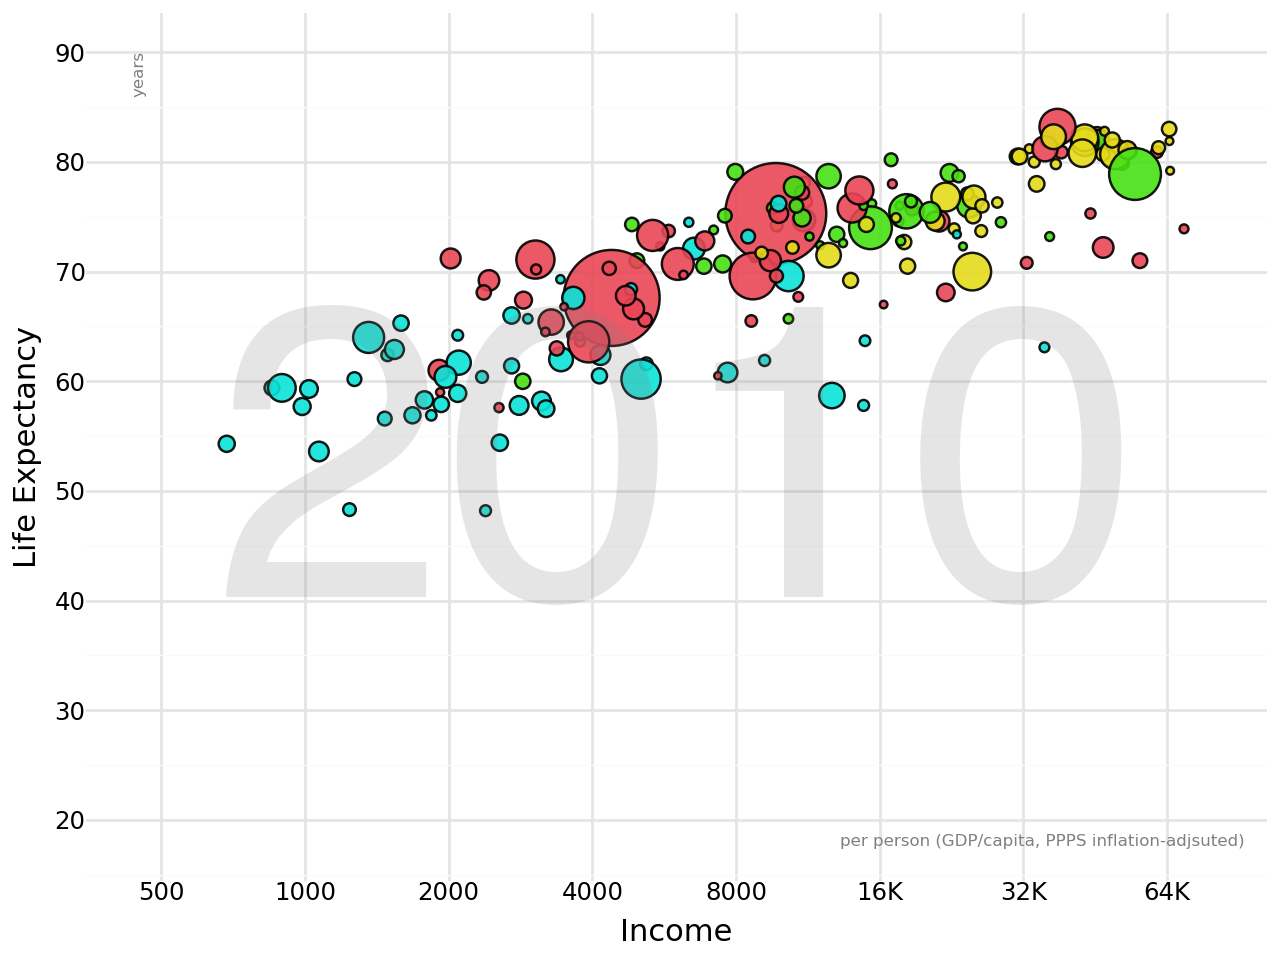

In [2]:
# Task 1a:
# print(q1_data)
from plotnine import *

# suggestion from ChatGPT for x-axis scale formatting
def custom_format_k(x): 
    if x >= 10000:
        return f'{int(x/1000)}K'
    return str(int(x))

reg_colors={ 
  "africa": "#0ce3d8",
  "americas": "#48e015", 
  "asia": "#e94656",
  "europe": "#e5db1c"
}


(ggplot(data = q1_data[q1_data["year"] == 2010], mapping = aes(x="income", y="life_exp", fill = "four_regions", size = "population"))
 + geom_point(alpha=0.9)
 + scale_fill_manual(values=reg_colors)
 + scale_x_continuous(trans="log2",  ## note: following parts of the code include suggestions from ChatGPT
    limits=(450, 80000), 
    breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000], 
    labels=[custom_format_k(x) for x in [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]])
 + scale_y_continuous(limits=(18, 90), breaks=np.arange(20, 91, 10)) 
 + scale_size(range=(1,20))
 + annotate("text", x=6000, y=50, label="2010", size=150, alpha=0.2, color="gray", family="sans-serif")
 + annotate("text", x=35000, y = 18, label="per person (GDP/capita, PPPS inflation-adjsuted)", size=6, color="gray")
 + annotate("text", x=450, y = 88, label="years", size=6, color="gray", angle=90)
 + theme_minimal()
 + theme(
   text=element_text(family="Bryant", color="black"),
   legend_position="none") 
 + labs( x="Income", y="Life Expectancy")
 )

/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 7 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_col : Removed 12 rows containing missing values.


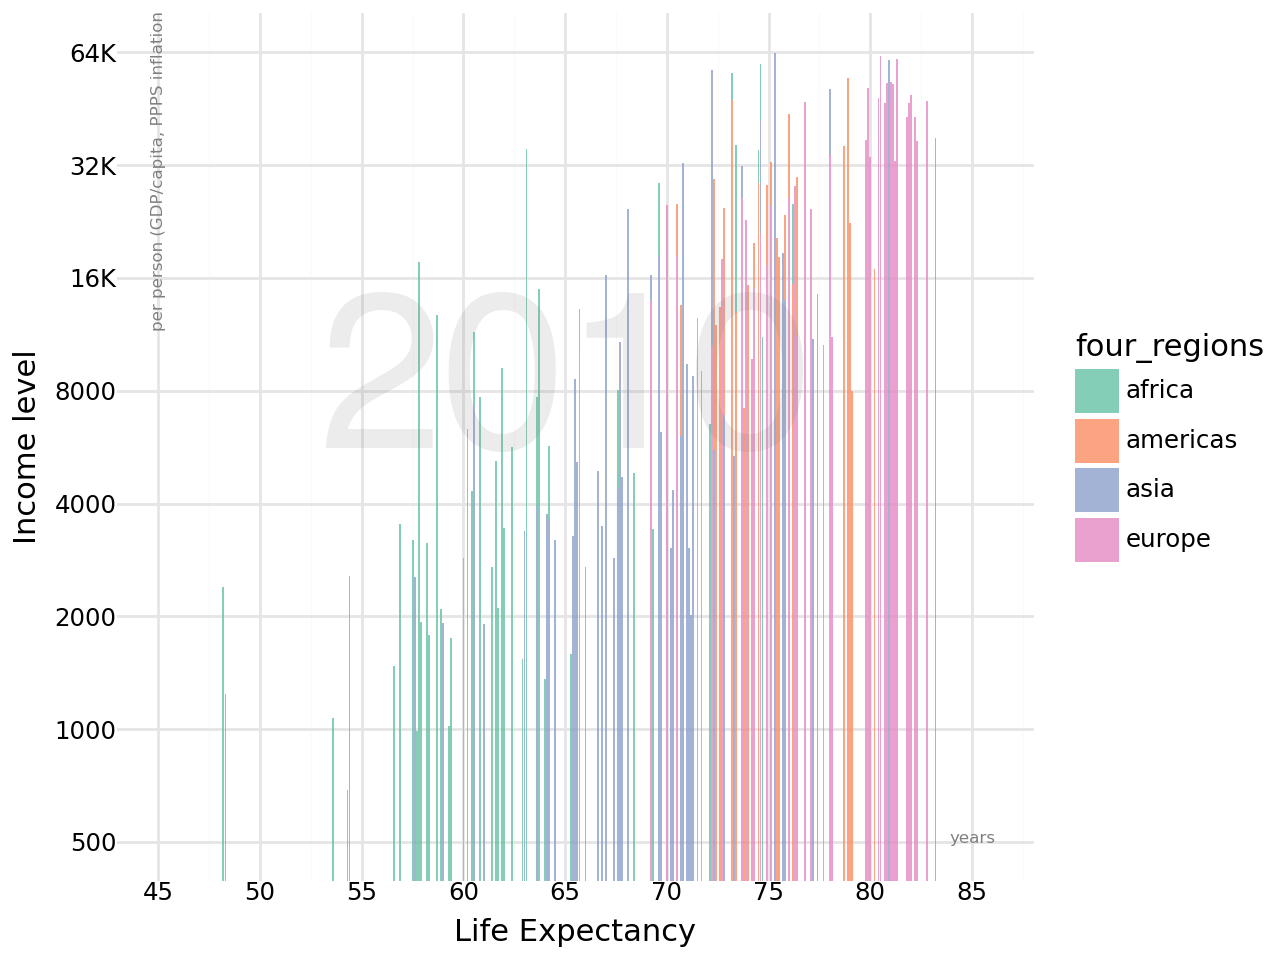

In [14]:

# Task 1.b: alternative visualization, using different geometry (columns) representing countries, so you can see which countries (regions) by color stack on which side of the plot.

# using same prior suggestion from ChatGPT for x(y)-axis scale formatting
def custom_format_k(y): 
    if y >= 10000:
        return f'{int(y/1000)}K'
    return str(int(y))

(ggplot(q1_data, aes(x='life_exp', y='income', fill='four_regions'))
 + geom_col(alpha = 0.8)  # geom_col bars where height position is defined by 'income' level and bar position on x-axis represents life expectancy per country
 + scale_x_continuous(limits=(45, 86), breaks=np.arange(45, 86, 5)) 
 + scale_y_continuous(trans='log2', 
    limits=(500, 64000), 
    breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],
    labels=[custom_format_k(y) for y in [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]])
 + annotate("text", y=8000, x=65, label="2010", size=80, alpha=0.15, color="gray", family="sans-serif")
 + annotate("text", y=40000, x = 45, label="per person (GDP/capita, PPPS inflation-adjsuted)", size=6, color="gray", angle=90)
 + annotate("text", y=510, x = 85, label="years", size=6, color="gray")
 + scale_fill_brewer(type='qual', palette="Set2")  # different color pallet based on ChatGPT suggestion
 + theme_minimal()
 + theme(
   text=element_text(family="Bryant", color="black"),
   legend_position="right") 
 + labs( x="Life Expectancy", y="Income level")
# + coord_flip() # option to view with flipped income and life_exp on x and y axis
## note: parts of this code where introduced based on suggestion from ChatGPT
)

# Comments to Task 1: 
In version 1b. you can more see the distribution how higher life is corresponding to higher income regions and more clear distribution of that by region (ie. the gap between African countries (on the left in green), Europe and Americas on the right side of the plot (pink and orange bars), and Asia (blue) in the middle). Unlike the original plot (1a), this second visualization doesn't capture the size of the population in each country.

# TASK 2: 
notes on original visualization example aesthetic:
scatterplot representing relationship between x = Exports, y = Imports as % of GDP
bubble size colored by World region and sized by energy
x,y axis scales, lables formating
+ scale_x_continuous() # values from 20 to 200, with 20 breaks
+ scale_y_continuous() # values from 50 to 400, with 50 breaks
plot background 1997
color theme and fonts

In [13]:
# Task 2: fixing data formatting first
# print(q2_data)
# q2_data.dtypes
q2_data["energy"] = q2_data["energy"].str.replace("k", "").astype(float)*1000
q2_data["energy"] = q2_data["energy"].astype(float)


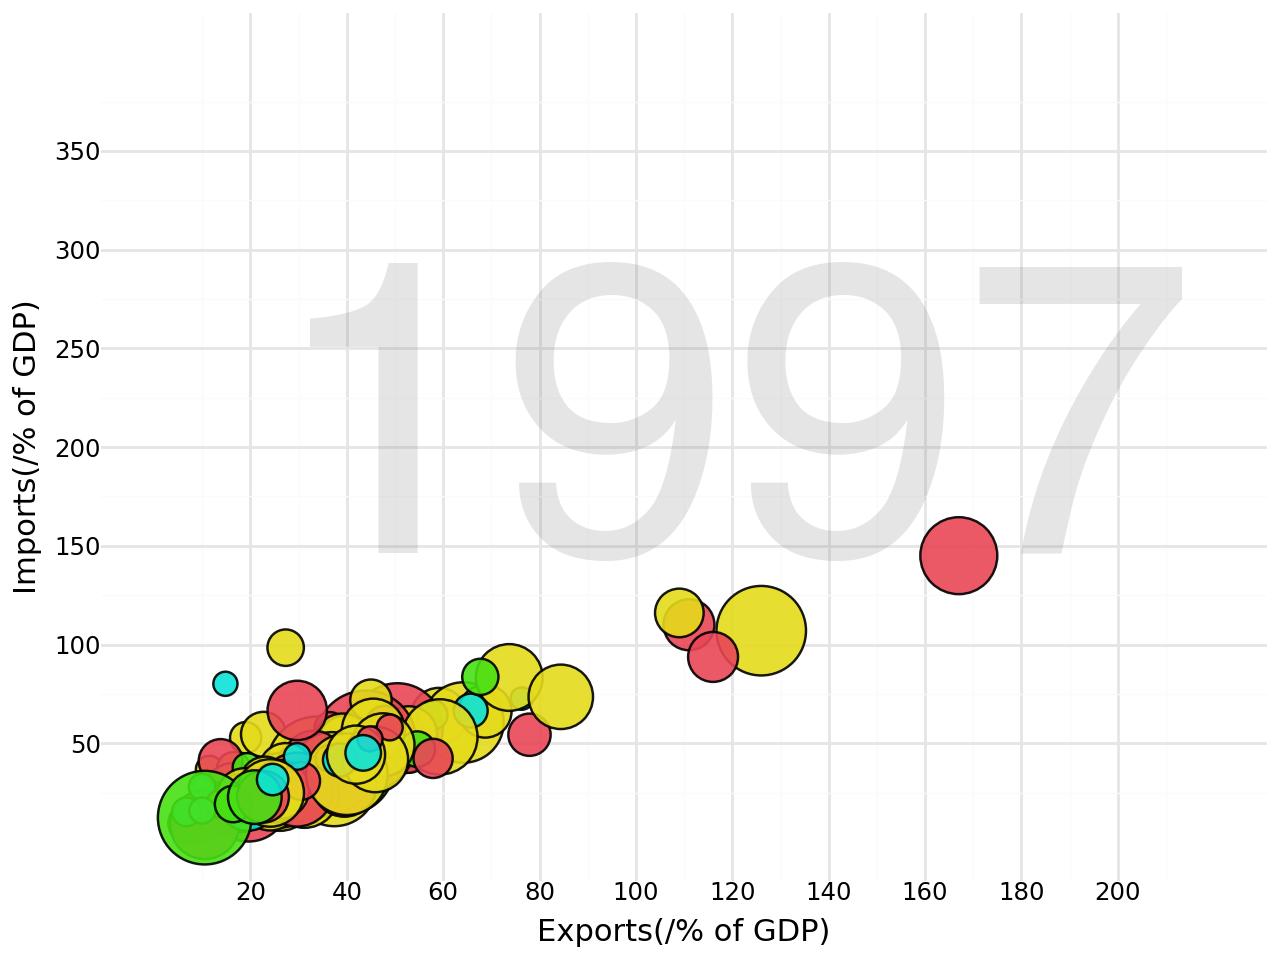

In [19]:
# Task 2a: creating plot

from plotnine import *
 
reg_colors={ 
  "africa": "#0ce3d8",
  "americas": "#48e015", 
  "asia": "#e94656",
  "europe": "#e5db1c"
}

(ggplot(data = q2_data[q2_data["year"] == 1997], mapping = aes(x="exports", y="imports", fill = "four_regions", size = "energy"))
 + geom_point(alpha=0.9) 
 + scale_fill_manual(values=reg_colors)
 + scale_x_continuous(limits=(0, 220), breaks=np.arange(20, 220, 20)) 
 + scale_y_continuous(limits=(0, 400), breaks=np.arange(50, 400, 50)) 
 + scale_size(range=(1,20))
 + annotate("text", x=120, y=200, label="1997", size=150, alpha=0.2, color="gray", family="sans-serif")
 + theme_minimal()
 + theme(
   text=element_text(family="Bryant", color="black"),
   legend_position="none") 
 + labs( x="Exports(/% of GDP)", y="Imports(/% of GDP)")
 )


Task 2b: alternative visualization - turning relationship between exports and imports to be reflected as one new data array 'Net Exports' = Exports - Imports, which is commonly used in macroeconomic analysis

In [42]:
# Task 2b: alternative visualization - turning relationship between exports and imports to be reflected as one new data array 'Net Exports' = (Exports - Imports), which is common metric used in macroeconomic analysis.

## checking data first
# q2_data["exports"]
# sum(q2_data["exports"])
# q2_data["imports"]
# sum(q2_data["imports"])
# sum(q2_data["exports"]) - sum(q2_data["imports"])

## creating new array for Net Exports in q2_data:
q2_data["net_exports"] = q2_data["exports"] - q2_data["imports"]
# q2_data["net_exports"]
# sum(q2_data["net_exports"])

# q2_data


,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region,net_exports
1,36.7,11.5,427000.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia,-25.2
2,22.5,22.6,825000.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa,0.1
6,12.9,10.4,1660000.0,1997,Argentina,americas,america,america_south,Latin America & Caribbean,-2.5
7,52.8,19.0,610000.0,1997,Armenia,europe,europe_central_asia,europe_east,Europe & Central Asia,-33.8
9,20.5,19.6,5550000.0,1997,Australia,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,-0.9
...,...,...,...,...,...,...,...,...,...,...
198,22.9,22.6,2080000.0,1997,Uzbekistan,asia,europe_central_asia,asia_west,Europe & Central Asia,-0.3
200,22.7,20.9,2250000.0,1997,Venezuela,americas,america,america_south,Latin America & Caribbean,-1.8
201,52.2,44.8,340000.0,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific,-7.4
204,31.6,24.6,617000.0,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa,-7.0


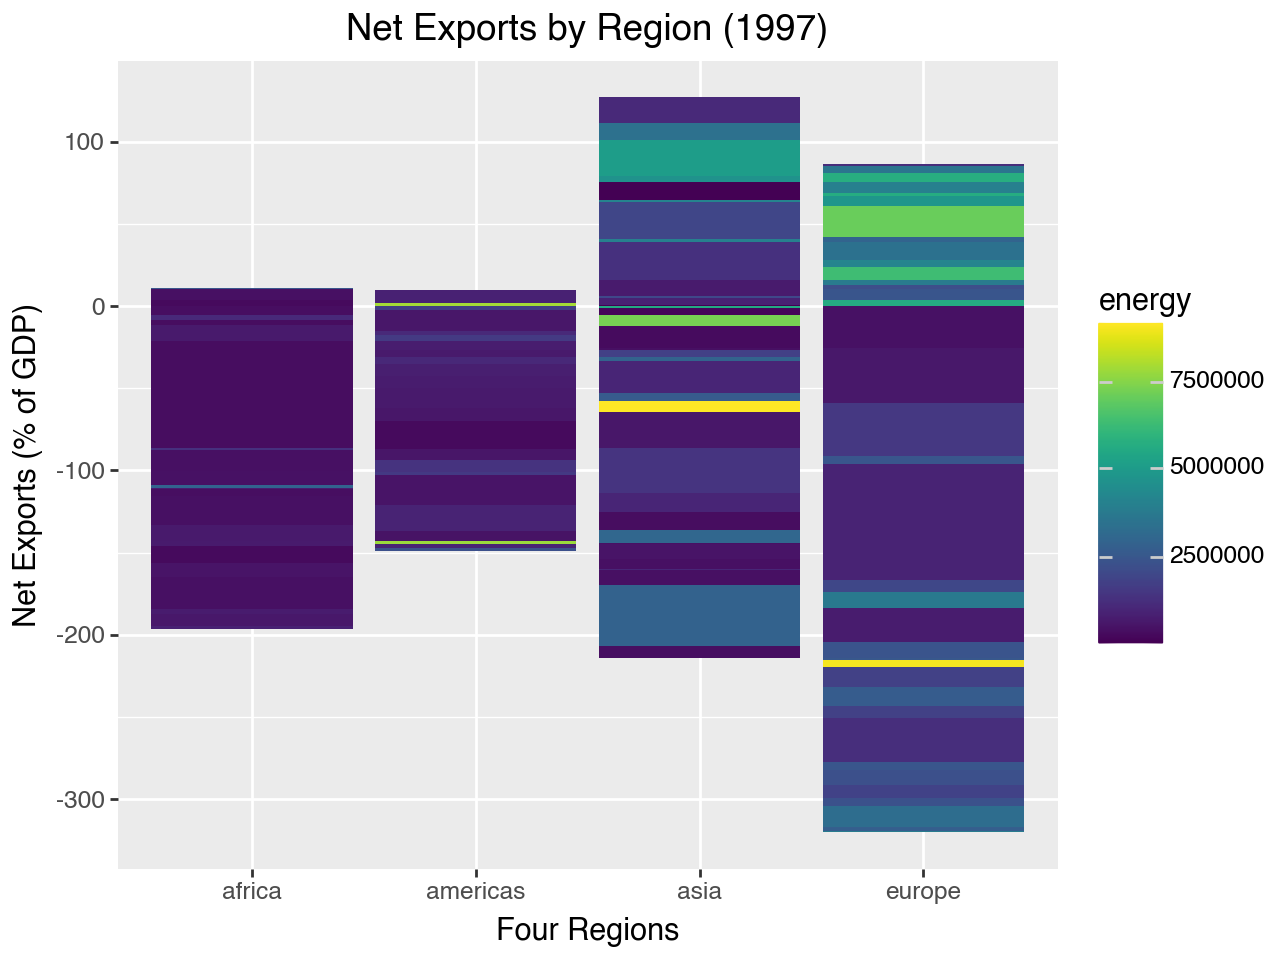

In [67]:
from plotnine import *

# using new geometry geom-bar to represent ranges of net exports in each of four regions
(ggplot(q2_data, aes(x="four_regions", y="net_exports", fill = "energy"))   
+ geom_bar(stat="identity")
+ labs( x="Four Regions", y="Net Exports (% of GDP)", title="Net Exports by Region (1997)")
)

# Comments to Task 2: 
In the alternative visualization 2b. you can see the ranges of the Net Exports reflecting the realtionship between export and imports for each of the four regions (instead of all being stacked to the bottom left on 2a.). Although 2b. still retains some view on the energy, there's not much insight on the individual countries compared on 2a.

# TASK 3: notes on original visualization example aesthetic
scatterplot representing relationship between x = Individuals using the internet, y = GDP per capita
bubble size colored by World region and sized by income
x,y axis varying scales, lables formating and sub labels
+ scale_x_continuous() # values from 10 to 90, with 10 breaks
+ scale_y_continuous() # values in range [200, 500, 1000, 2000, 5000, 10k, 20k, 50k, 100k]
plot background 2001
color theme and fonts
Afganitstan removed (crossed out on the example plot from Gapminder)

In [10]:
# Task 3: data check

# q3_data.dtypes
# q3_data["gdp"].max()
# q3_data.drop(0, inplace=True)
# print(q3_data)

<positron-console-cell-12>:28: SyntaxWarning: invalid escape sequence '\ '
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 45 rows containing missing values.


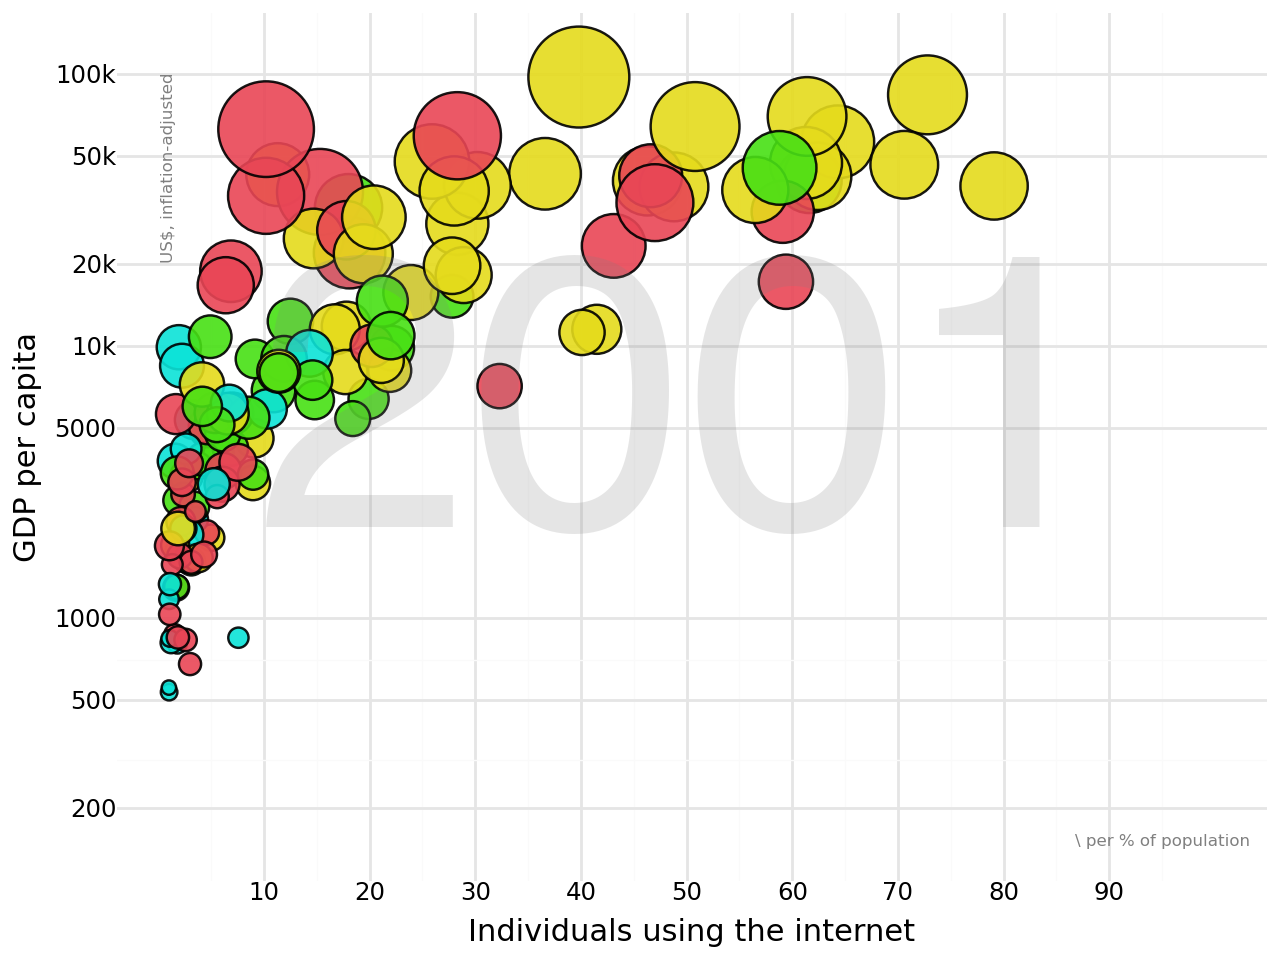

In [12]:
# Task 3a:
from plotnine import *

# suggestion from ChatGPT for y-axis scale formatting
def custom_format_k(y): 
    if y > 5000:
        return f'{int(y/1000)}k'
    return str(int(y))

reg_colors={ 
  "africa": "#0ce3d8",
  "americas": "#48e015", 
  "asia": "#e94656",
  "europe": "#e5db1c"
}

(ggplot(data = q3_data, mapping = aes(x="internet_users", y="gdp", fill = "four_regions", size = "income"))
 + geom_point(alpha=0.9) 
 + scale_fill_manual(values=reg_colors)
 + scale_x_continuous(limits=(1, 100), breaks=np.arange(10, 91, 10)) 
 + scale_y_continuous(trans="log10",
    limits=(150, 120000), 
    breaks=[200, 500, 1000, 5000, 10000, 20000, 50000, 100000],
    labels=[custom_format_k(y) for y in [200, 500, 1000, 5000, 10000, 20000, 50000, 100000]],
    minor_breaks=[300,700]) # couldn't replicate the minor breaks as visually as on example
 + scale_size_continuous(range=(1,20))
 + annotate("text", x=50, y=5000, label="2001", size=140, alpha=0.2, color="gray", family="sans-serif")
 + annotate("text", x=95, y = 150, label="\ % of population", size=6, color="gray")
 + annotate("text", x=1, y = 45000, label="US$, inflation-adjusted", size=6, color="gray", angle=90)
 + theme_minimal()
 + theme(
   text=element_text(family="Bryant", color="black"),
   legend_position="none") 
 + labs( x="Individuals using the internet", y="GDP per capita")
 )

 # note: for some reason geom removed 77 rows with missing values (which likely removed values between 200 and 500 on y axis), also check with Dr. Glantz - he didn't find an issue, why those values dissaoppear after checking my code


Task 3b: Alternative visualization with box plot for 4 regions

<positron-console-cell-101>:28: SyntaxWarning: invalid escape sequence '\ '
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 45 rows containing non-finite values.


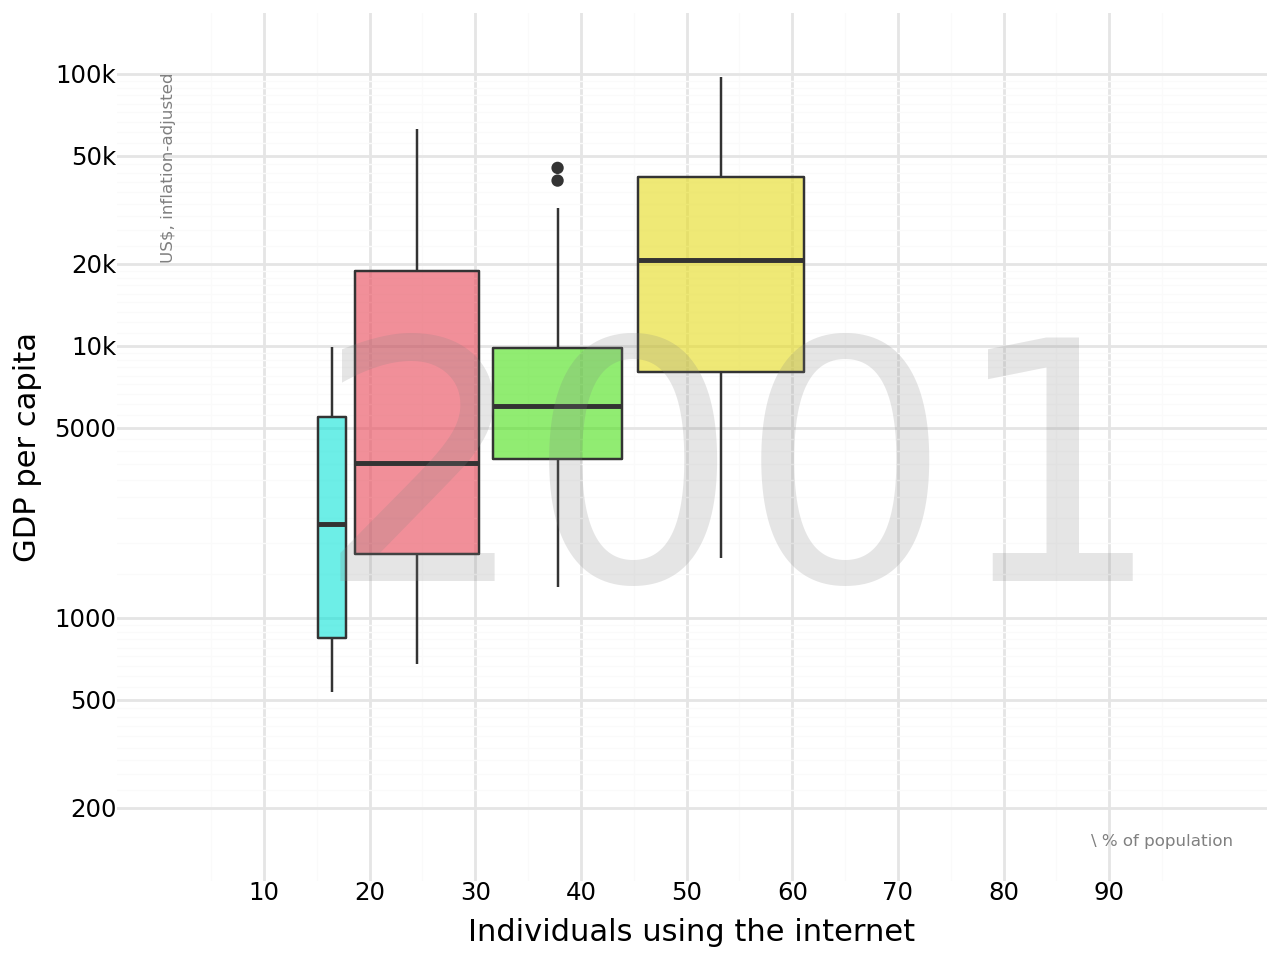

In [101]:
# using prior suggestion from ChatGPT for y-axis scale formatting
def custom_format_k(y): 
    if y > 5000:
        return f'{int(y/1000)}k'
    return str(int(y))

reg_colors={ 
  "africa": "#0ce3d8",
  "americas": "#48e015", 
  "asia": "#e94656",
  "europe": "#e5db1c"
}

(ggplot(q3_data,
aes(
  x = "internet_users",
  y = "gdp",
  fill = "four_regions",
))
+ geom_boxplot(alpha = 0.6)
+ scale_fill_manual(values=reg_colors)
+ scale_x_continuous(limits=(1, 100), breaks=np.arange(10, 91, 10)) 
+ scale_y_continuous(trans="log10",
  limits=(150, 120000), 
  breaks=[200, 500, 1000, 5000, 10000, 20000, 50000, 100000],
  labels=[custom_format_k(y) for y in [200, 500, 1000, 5000, 10000, 20000, 50000, 100000]])
+ annotate("text", x=55, y=3000, label="2001", size=120, alpha=0.2, color="gray")
+ annotate("text", x=95, y = 150, label="\ % of population", size=6, color="gray")
+ annotate("text", x=1, y = 45000, label="US$, inflation-adjusted", size=6, color="gray", angle=90)
+ theme_minimal()
+ theme(text=element_text(family="Bryant", color="black"), legend_position="none") 
+ labs( x="Individuals using the internet", y="GDP per capita")
 )

# Comments to Task 3:
In the second visualization 3b. it is a bit easier to differentiate the regions as the whole, for relative regional compariosn, however the scaling based on income for the individual countries is not visible. 